In [4]:
import numpy as np;
import tensorflow as tf;
from scipy.special import softmax;
from matplotlib import pyplot as plt;

In [5]:
bs = 64;
laeeb = tf.keras.models.load_model("./laeeb/");

def map_func(image, label):
    image = tf.cast(image, tf.uint8);
    image = tf.keras.applications.vgg16.preprocess_input(image);
    return (image, label);

In [3]:
test_ds = tf.keras.utils.image_dataset_from_directory("./Dataset/test/", label_mode="categorical", batch_size=bs, image_size=(50, 50), shuffle=False);
test_ds = test_ds.map(map_func, num_parallel_calls=tf.data.AUTOTUNE, deterministic=False);

Found 6000 files belonging to 20 classes.


In [17]:
laeeb.evaluate(test_ds)

94/94 [==============================] - 162s 2s/step - loss: 0.0540 - binary_accuracy: 0.9984


[0.053975529968738556, 0.998408317565918]

In [18]:
pred = laeeb.predict(test_ds);

94/94 [==============================] - 173s 2s/step


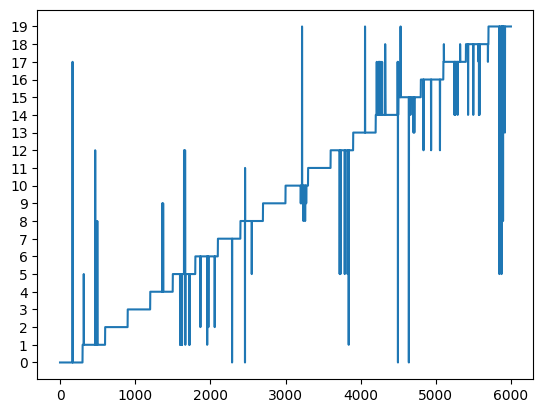

In [23]:
plt.yticks(range(20))
plt.plot(np.argmax(pred, axis=1))

In [13]:
man_test = tf.keras.utils.image_dataset_from_directory("./demo_data/mask/", label_mode="categorical", batch_size=bs, image_size=(50, 50), shuffle=False);
print([*zip(range(20), man_test.class_names)])
man_test = man_test.map(map_func, num_parallel_calls=tf.data.AUTOTUNE, deterministic=False);

Found 6 files belonging to 20 classes.
[(0, '0'), (1, '1'), (2, '10'), (3, '11'), (4, '12'), (5, '13'), (6, '14'), (7, '15'), (8, '16'), (9, '17'), (10, '18'), (11, '19'), (12, '2'), (13, '3'), (14, '4'), (15, '5'), (16, '6'), (17, '7'), (18, '8'), (19, '9')]


[0, 1, 12, 13, 14, 15]


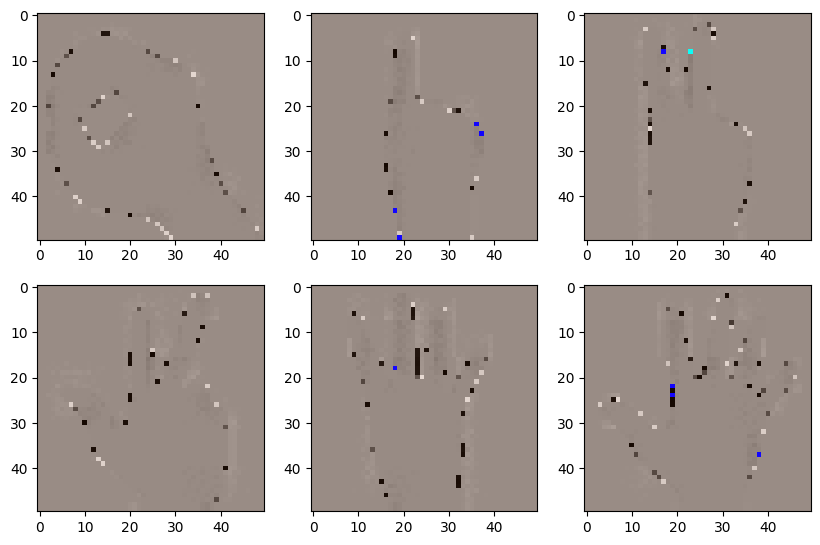

In [14]:
fig = plt.figure(figsize=(10, 10))  # width, height in inches
lbl = [];
for i in range(6):
    sub = fig.add_subplot(3, 3, i + 1)
    sub.imshow(next(iter(man_test))[0][i])
    lbl.append(np.argmax(next(iter(man_test))[1][i]));
print(lbl);
plt.show();

In [5]:
laeeb.evaluate(man_test)

1/1 [==============================] - 1s 815ms/step - loss: 5.3876 - binary_accuracy: 0.9000


[5.387553691864014, 0.8999999761581421]

In [15]:
pred = laeeb.predict(man_test)
np.argmax(pred, axis=1)

1/1 [==============================] - 0s 371ms/step


array([ 0,  1,  5, 19, 14, 13], dtype=int64)

In [11]:
import cv2;
img = cv2.imread("./demo_data/mask/0/01.jpg");
img = tf.keras.applications.vgg16.preprocess_input(img)
img = np.expand_dims(img, axis=0)
pred = laeeb.predict(img)

1/1 [==============================] - 1s 592ms/step


In [16]:
pred

array([-103.939, -116.779, -123.68 ], dtype=float32)